In [1]:
# Building the Stock Predication Model for 2023 using RNN Neural Network

In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Reading xlsx file using pandas
df = pd.read_excel('Stocks.xlsx')

In [3]:
df

,S.No.,SECTOR,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,6mth return %,3mth return %,PEG,Current ratio,EV Rs.Cr.,CMP / FCF,CMP / Sales
0,1,Trading,Adani Enterp.,2251.25,98.52,256642.75,0.05,333.34,-40.38,22517.33,-41.02,9.49,13.17,-10.41,3.60,0.80,306948.71,-116.58,2.42
1,2,Trading,Mankind Pharma,1801.00,51.05,72145.99,0.00,472.88,12.53,2453.35,8.67,20.70,27.66,-2.31,4.29,2.86,71944.25,332.81,8.43
2,3,Trading,Redington,151.40,9.56,11834.76,4.79,311.64,-21.58,22220.15,16.64,24.92,-15.78,-5.85,0.40,1.37,13883.59,37.51,0.14
3,4,Trading,Aegis Logistics,294.55,20.31,10338.72,1.96,150.01,35.97,1234.86,-42.58,15.90,-24.06,-20.57,1.12,3.86,10953.67,-147.89,1.36
4,5,Trading,MMTC,54.54,17.96,8181.00,0.00,14.66,80.33,214.47,-85.81,23.01,75.45,41.42,0.37,1.48,7037.57,9.99,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,4428,Agro Chemicals,Crop Life Scienc,40.60,25.03,69.59,0.00,NaN,NaN,NaN,NaN,10.65,NaN,NaN,NaN,1.47,89.05,216.96,0.74
4428,4429,Agro Chemicals,Aristo Bio-Tech,85.00,16.26,57.86,0.30,1.00,NaN,88.81,NaN,16.11,39.24,15.60,-16.59,1.40,78.50,-63.05,0.27
4429,4430,Agro Chemicals,Super Crop Safe,9.28,24.71,37.32,0.00,0.18,148.65,5.81,35.43,6.22,82.98,1.28,-0.90,1.65,54.28,99.93,1.55
4430,4431,Agro Chemicals,Bhaskar Agrochem,40.50,150.72,21.10,0.00,-2.03,-4.64,7.33,36.75,12.22,-39.60,-31.54,-15.04,1.03,36.61,-23.49,0.37


In [4]:
# Dropping SECTOR column
df = df.drop(['SECTOR'], axis=1)
df

,S.No.,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,6mth return %,3mth return %,PEG,Current ratio,EV Rs.Cr.,CMP / FCF,CMP / Sales
0,1,Adani Enterp.,2251.25,98.52,256642.75,0.05,333.34,-40.38,22517.33,-41.02,9.49,13.17,-10.41,3.60,0.80,306948.71,-116.58,2.42
1,2,Mankind Pharma,1801.00,51.05,72145.99,0.00,472.88,12.53,2453.35,8.67,20.70,27.66,-2.31,4.29,2.86,71944.25,332.81,8.43
2,3,Redington,151.40,9.56,11834.76,4.79,311.64,-21.58,22220.15,16.64,24.92,-15.78,-5.85,0.40,1.37,13883.59,37.51,0.14
3,4,Aegis Logistics,294.55,20.31,10338.72,1.96,150.01,35.97,1234.86,-42.58,15.90,-24.06,-20.57,1.12,3.86,10953.67,-147.89,1.36
4,5,MMTC,54.54,17.96,8181.00,0.00,14.66,80.33,214.47,-85.81,23.01,75.45,41.42,0.37,1.48,7037.57,9.99,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,4428,Crop Life Scienc,40.60,25.03,69.59,0.00,NaN,NaN,NaN,NaN,10.65,NaN,NaN,NaN,1.47,89.05,216.96,0.74
4428,4429,Aristo Bio-Tech,85.00,16.26,57.86,0.30,1.00,NaN,88.81,NaN,16.11,39.24,15.60,-16.59,1.40,78.50,-63.05,0.27
4429,4430,Super Crop Safe,9.28,24.71,37.32,0.00,0.18,148.65,5.81,35.43,6.22,82.98,1.28,-0.90,1.65,54.28,99.93,1.55
4430,4431,Bhaskar Agrochem,40.50,150.72,21.10,0.00,-2.03,-4.64,7.33,36.75,12.22,-39.60,-31.54,-15.04,1.03,36.61,-23.49,0.37


In [5]:
# Viewing null columns
df.isnull().sum()

S.No.                  0
Name                   0
CMP Rs.                0
P/E                 1191
Mar Cap Rs.Cr.         0
Div Yld %             20
NP Qtr Rs.Cr.         81
Qtr Profit Var %     512
Sales Qtr Rs.Cr.      81
Qtr Sales Var %      853
ROCE %               161
6mth return %        191
3mth return %        120
PEG                 1772
Current ratio         27
EV Rs.Cr.              9
CMP / FCF            157
CMP / Sales          286
dtype: int64

In [6]:
# Inserting mean values to each  null cells
df['P/E'] = df['P/E'].fillna(df['P/E'].mean())
df['Div Yld\xa0%'] = df['Div Yld\xa0%'].fillna(df['Div Yld\xa0%'].mean())
df['NP Qtr\xa0Rs.Cr.'] = df['NP Qtr\xa0Rs.Cr.'].fillna(df['NP Qtr\xa0Rs.Cr.'].mean())
df['Qtr Profit Var\xa0%'] = df['Qtr Profit Var\xa0%'].fillna(df['Qtr Profit Var\xa0%'].mean())
df['Sales Qtr\xa0Rs.Cr.'] = df['Sales Qtr\xa0Rs.Cr.'].fillna(df['Sales Qtr\xa0Rs.Cr.'].mean())
df['Qtr Sales Var\xa0%'] = df['Qtr Sales Var\xa0%'].fillna(df['Qtr Sales Var\xa0%'].mean())

In [7]:
df

,S.No.,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,6mth return %,3mth return %,PEG,Current ratio,EV Rs.Cr.,CMP / FCF,CMP / Sales
0,1,Adani Enterp.,2251.25,98.520000,256642.75,0.05,333.340000,-40.380000,22517.330000,-41.020000,9.49,13.17,-10.41,3.60,0.80,306948.71,-116.58,2.42
1,2,Mankind Pharma,1801.00,51.050000,72145.99,0.00,472.880000,12.530000,2453.350000,8.670000,20.70,27.66,-2.31,4.29,2.86,71944.25,332.81,8.43
2,3,Redington,151.40,9.560000,11834.76,4.79,311.640000,-21.580000,22220.150000,16.640000,24.92,-15.78,-5.85,0.40,1.37,13883.59,37.51,0.14
3,4,Aegis Logistics,294.55,20.310000,10338.72,1.96,150.010000,35.970000,1234.860000,-42.580000,15.90,-24.06,-20.57,1.12,3.86,10953.67,-147.89,1.36
4,5,MMTC,54.54,17.960000,8181.00,0.00,14.660000,80.330000,214.470000,-85.810000,23.01,75.45,41.42,0.37,1.48,7037.57,9.99,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,4428,Crop Life Scienc,40.60,25.030000,69.59,0.00,86.080246,218.801107,972.092868,260.598919,10.65,NaN,NaN,NaN,1.47,89.05,216.96,0.74
4428,4429,Aristo Bio-Tech,85.00,16.260000,57.86,0.30,1.000000,218.801107,88.810000,260.598919,16.11,39.24,15.60,-16.59,1.40,78.50,-63.05,0.27
4429,4430,Super Crop Safe,9.28,24.710000,37.32,0.00,0.180000,148.650000,5.810000,35.430000,6.22,82.98,1.28,-0.90,1.65,54.28,99.93,1.55
4430,4431,Bhaskar Agrochem,40.50,150.720000,21.10,0.00,-2.030000,-4.640000,7.330000,36.750000,12.22,-39.60,-31.54,-15.04,1.03,36.61,-23.49,0.37


In [8]:
# Now again viewing null columns
df.isnull().sum()

S.No.                  0
Name                   0
CMP Rs.                0
P/E                    0
Mar Cap Rs.Cr.         0
Div Yld %              0
NP Qtr Rs.Cr.          0
Qtr Profit Var %       0
Sales Qtr Rs.Cr.       0
Qtr Sales Var %        0
ROCE %               161
6mth return %        191
3mth return %        120
PEG                 1772
Current ratio         27
EV Rs.Cr.              9
CMP / FCF            157
CMP / Sales          286
dtype: int64

In [9]:
# Viewing shape
df.shape

(4432, 18)

In [11]:
# Dividing into independent and dependent features
X = df.drop('CMP\xa0Rs.', axis=1)
X

,S.No.,Name,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,6mth return %,3mth return %,PEG,Current ratio,EV Rs.Cr.,CMP / FCF,CMP / Sales
0,1,Adani Enterp.,98.520000,256642.75,0.05,333.340000,-40.380000,22517.330000,-41.020000,9.49,13.17,-10.41,3.60,0.80,306948.71,-116.58,2.42
1,2,Mankind Pharma,51.050000,72145.99,0.00,472.880000,12.530000,2453.350000,8.670000,20.70,27.66,-2.31,4.29,2.86,71944.25,332.81,8.43
2,3,Redington,9.560000,11834.76,4.79,311.640000,-21.580000,22220.150000,16.640000,24.92,-15.78,-5.85,0.40,1.37,13883.59,37.51,0.14
3,4,Aegis Logistics,20.310000,10338.72,1.96,150.010000,35.970000,1234.860000,-42.580000,15.90,-24.06,-20.57,1.12,3.86,10953.67,-147.89,1.36
4,5,MMTC,17.960000,8181.00,0.00,14.660000,80.330000,214.470000,-85.810000,23.01,75.45,41.42,0.37,1.48,7037.57,9.99,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,4428,Crop Life Scienc,25.030000,69.59,0.00,86.080246,218.801107,972.092868,260.598919,10.65,NaN,NaN,NaN,1.47,89.05,216.96,0.74
4428,4429,Aristo Bio-Tech,16.260000,57.86,0.30,1.000000,218.801107,88.810000,260.598919,16.11,39.24,15.60,-16.59,1.40,78.50,-63.05,0.27
4429,4430,Super Crop Safe,24.710000,37.32,0.00,0.180000,148.650000,5.810000,35.430000,6.22,82.98,1.28,-0.90,1.65,54.28,99.93,1.55
4430,4431,Bhaskar Agrochem,150.720000,21.10,0.00,-2.030000,-4.640000,7.330000,36.750000,12.22,-39.60,-31.54,-15.04,1.03,36.61,-23.49,0.37


In [12]:
Y = df['CMP\xa0Rs.']
Y

0       2251.25
1       1801.00
2        151.40
3        294.55
4         54.54
         ...   
4427      40.60
4428      85.00
4429       9.28
4430      40.50
4431      43.00
Name: CMP Rs., Length: 4432, dtype: float64

In [13]:
# Viewing shape
X.shape

(4432, 17)

In [14]:
Y.shape

(4432,)

In [15]:
# Importing Tensorflow Library
import tensorflow as tf

print(tf.__version__)

2.15.0


In [16]:
# RNN and tensorflow part starts
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [17]:
# portfolio
portfolio = X.copy()

In [20]:
portfolio['Name'][0], portfolio['Name'][1], portfolio['Name'][2], Y[0], Y[1], Y[2]

('Adani Enterp.', 'Mankind Pharma', 'Redington', 2251.25, 1801.0, 151.4)

In [175]:
portfolio

,S.No.,Name,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,6mth return %,3mth return %,PEG,Current ratio,EV Rs.Cr.,CMP / FCF,CMP / Sales
0,1,Adani Enterp.,98.520000,256642.75,0.05,333.340000,-40.380000,22517.330000,-41.020000,9.49,13.17,-10.41,3.60,0.80,306948.71,-116.58,2.42
1,2,Mankind Pharma,51.050000,72145.99,0.00,472.880000,12.530000,2453.350000,8.670000,20.70,27.66,-2.31,4.29,2.86,71944.25,332.81,8.43
2,3,Redington,9.560000,11834.76,4.79,311.640000,-21.580000,22220.150000,16.640000,24.92,-15.78,-5.85,0.40,1.37,13883.59,37.51,0.14
3,4,Aegis Logistics,20.310000,10338.72,1.96,150.010000,35.970000,1234.860000,-42.580000,15.90,-24.06,-20.57,1.12,3.86,10953.67,-147.89,1.36
4,5,MMTC,17.960000,8181.00,0.00,14.660000,80.330000,214.470000,-85.810000,23.01,75.45,41.42,0.37,1.48,7037.57,9.99,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,4428,Crop Life Scienc,25.030000,69.59,0.00,86.080246,218.801107,972.092868,260.598919,10.65,NaN,NaN,NaN,1.47,89.05,216.96,0.74
4428,4429,Aristo Bio-Tech,16.260000,57.86,0.30,1.000000,218.801107,88.810000,260.598919,16.11,39.24,15.60,-16.59,1.40,78.50,-63.05,0.27
4429,4430,Super Crop Safe,24.710000,37.32,0.00,0.180000,148.650000,5.810000,35.430000,6.22,82.98,1.28,-0.90,1.65,54.28,99.93,1.55
4430,4431,Bhaskar Agrochem,150.720000,21.10,0.00,-2.030000,-4.640000,7.330000,36.750000,12.22,-39.60,-31.54,-15.04,1.03,36.61,-23.49,0.37


In [176]:
# reset the index
portfolio.reset_index(inplace=True)
portfolio

,index,S.No.,Name,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,6mth return %,3mth return %,PEG,Current ratio,EV Rs.Cr.,CMP / FCF,CMP / Sales
0,0,1,Adani Enterp.,98.520000,256642.75,0.05,333.340000,-40.380000,22517.330000,-41.020000,9.49,13.17,-10.41,3.60,0.80,306948.71,-116.58,2.42
1,1,2,Mankind Pharma,51.050000,72145.99,0.00,472.880000,12.530000,2453.350000,8.670000,20.70,27.66,-2.31,4.29,2.86,71944.25,332.81,8.43
2,2,3,Redington,9.560000,11834.76,4.79,311.640000,-21.580000,22220.150000,16.640000,24.92,-15.78,-5.85,0.40,1.37,13883.59,37.51,0.14
3,3,4,Aegis Logistics,20.310000,10338.72,1.96,150.010000,35.970000,1234.860000,-42.580000,15.90,-24.06,-20.57,1.12,3.86,10953.67,-147.89,1.36
4,4,5,MMTC,17.960000,8181.00,0.00,14.660000,80.330000,214.470000,-85.810000,23.01,75.45,41.42,0.37,1.48,7037.57,9.99,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,4427,4428,Crop Life Scienc,25.030000,69.59,0.00,86.080246,218.801107,972.092868,260.598919,10.65,NaN,NaN,NaN,1.47,89.05,216.96,0.74
4428,4428,4429,Aristo Bio-Tech,16.260000,57.86,0.30,1.000000,218.801107,88.810000,260.598919,16.11,39.24,15.60,-16.59,1.40,78.50,-63.05,0.27
4429,4429,4430,Super Crop Safe,24.710000,37.32,0.00,0.180000,148.650000,5.810000,35.430000,6.22,82.98,1.28,-0.90,1.65,54.28,99.93,1.55
4430,4430,4431,Bhaskar Agrochem,150.720000,21.10,0.00,-2.030000,-4.640000,7.330000,36.750000,12.22,-39.60,-31.54,-15.04,1.03,36.61,-23.49,0.37


In [24]:
# Converting text to integer
vocab_size = 1000
onehot_repr = [one_hot(words, vocab_size) for words in portfolio['Name']]
onehot_repr

[[603, 368],
 [13, 784],
 [426],
 [381, 228],
 [113],
 [338],
 [490, 764],
 [310, 911],
 [713, 925],
 [525, 54],
 [42, 160, 66],
 [276, 480],
 [988, 517],
 [933, 814],
 [945, 822],
 [666, 172],
 [426, 317],
 [168, 409, 950],
 [336, 54],
 [16, 851, 703],
 [752, 54],
 [261, 764],
 [823, 822],
 [885, 2],
 [496, 229, 443],
 [16, 76, 54],
 [839, 864],
 [885, 83],
 [345, 644],
 [678],
 [183, 411],
 [127, 784],
 [475, 322],
 [128, 980, 389],
 [314, 651],
 [727, 774],
 [560, 54],
 [51, 237, 236],
 [315, 999],
 [846, 822, 755],
 [703, 770],
 [441, 894],
 [810],
 [820],
 [79, 761],
 [165, 100],
 [572, 323],
 [222, 83],
 [504, 78, 625],
 [309, 56],
 [904, 784],
 [816, 468],
 [27, 736, 89],
 [475, 574],
 [654, 341, 296, 190],
 [350, 508],
 [18, 54],
 [302, 268],
 [730, 78],
 [995, 447],
 [939, 159, 684],
 [753, 673],
 [258, 298, 190],
 [348, 107, 950],
 [133, 808],
 [95, 100],
 [811, 524],
 [442, 326],
 [89, 54],
 [428, 818, 36],
 [389, 368],
 [810, 39],
 [376, 84, 198, 54],
 [714, 611],
 [951, 73

In [25]:
# Embedding representations
sent_length = 5
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedded_docs

array([[  0,   0,   0, 603, 368],
       [  0,   0,   0,  13, 784],
       [  0,   0,   0,   0, 426],
       ...,
       [  0,   0, 785,  43, 561],
       [  0,   0,   0, 369, 640],
       [  0,   0, 435, 606, 864]])

In [44]:
from tensorflow.keras.layers import SimpleRNN

In [66]:
# Building SimpleRNN model
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sent_length))
model.add(SimpleRNN(200))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 5, 40)             40000     
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 200)               48200     
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 108401 (423.44 KB)
Trainable params: 10

In [68]:
# Converting to array using numpy
import numpy as np

X = np.array(embedded_docs)
Y = np.array(Y)
X, Y

(array([[  0,   0,   0, 603, 368],
        [  0,   0,   0,  13, 784],
        [  0,   0,   0,   0, 426],
        ...,
        [  0,   0, 785,  43, 561],
        [  0,   0,   0, 369, 640],
        [  0,   0, 435, 606, 864]]),
 array([2251.25, 1801.  ,  151.4 , ...,    9.28,   40.5 ,   43.  ]))

In [69]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [70]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Epoch 1/10
56/56 [==============================] - 1s 7ms/step - loss: -15188.3867 - accuracy: 8.4626e-04 - val_loss: -39225.8398 - val_accuracy: 0.0000e+00
Epoch 2/10
56/56 [==============================] - 0s 4ms/step - loss: -70006.1250 - accuracy: 8.4626e-04 - val_loss: -110723.5703 - val_accuracy: 0.0000e+00
Epoch 3/10
56/56 [==============================] - 0s 4ms/step - loss: -155578.8906 - accuracy: 8.4626e-04 - val_loss: -218735.1562 - val_accuracy: 0.0000e+00
Epoch 4/10
56/56 [==============================] - 0s 4ms/step - loss: -273268.9062 - accuracy: 8.4626e-04 - val_loss: -361025.0312 - val_accuracy: 0.0000e+00
Epoch 5/10
56/56 [==============================] - 0s 4ms/step - loss: -443214.0312 - accuracy: 8.4626e-04 - val_loss: -548853.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
56/56 [==============================] - 0s 4ms/step - loss: -648287.2500 - accuracy: 8.4626e-04 - val_loss: -775636.9375 - val_accuracy: 0.0000e+00
Epoch 7/10
56/56 [=========================

In [71]:
# Performance of the model
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

28/28 [==============================] - 0s 1ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [72]:
Y_test = np.array(Y_test)
Y_test = np.where(Y_test > 0.5, 1, 0)
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9966178128523112

<Axes: >

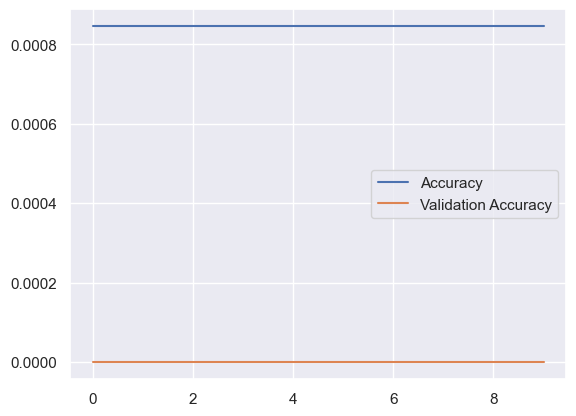

In [74]:
# Plotting the accuracy variable using seaborn library with label
import seaborn as sns
sns.set()
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='Validation Accuracy')

<Axes: >

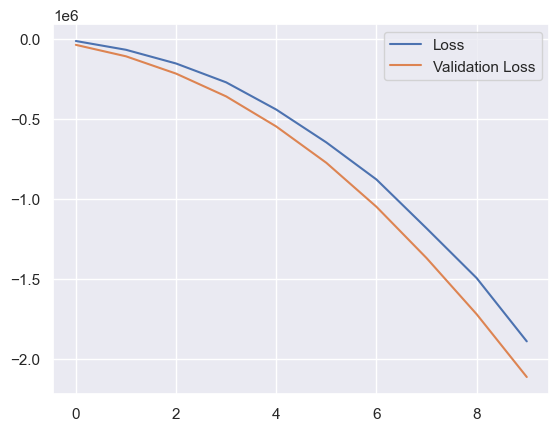

In [75]:
# Plotting the loss variable using seaborn library with label
sns.lineplot(x=history.epoch, y=history.history['loss'], label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='Validation Loss')